# LHC Luminosity
<hr style="border-top-width: 4px; border-top-color: #34609b;">

Extract live data from the [LHC](http://home.cern/topics/large-hadron-collider) and create interactive plots with [PyTimber](https://gitlab.cern.ch/acc-logging-team/nxcals/-/tree/develop/python/pytimber).

## Preparation
Let's import all the Python modules necessary for this study and tell matplotlib to generate interactive javascript plots.

In [18]:
# Enable an interactive mode for Matplotlib plots
%matplotlib notebook

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
import pytz
import pytimber

We now open the connection to the database:

In [2]:
db = pytimber.LoggingDB(spark_session=spark)

## Retrieve the data from the logging database
We are now ready to open a connection to the logging database and extract the luminosity for the past 24 hours.

In [3]:
now = time.time()
now_minus_a_day = now - 3600 * 24

t1 = "2016-08-03 14:00:00"
t2 = "2016-08-04 12:00:00"

# Uncomment for recent data
# t1 = now
# t2 = now_minus_a_day

alice = 'ALICE:LUMI_TOT_INST'
atlas = 'ATLAS:LUMI_TOT_INST'
cms = 'CMS:LUMI_TOT_INST'
lhcb = 'LHCB:LUMI_TOT_INST'
data = db.get([alice, atlas, cms, lhcb], t1, t2)

## Plotting the data

We can now build a plot of the intensity and beams energy starting from the data we retrieved. The [matplotlib](https://matplotlib.org) library can be used for creating interactive javascript based data visualisations.

<IPython.core.display.Javascript object>


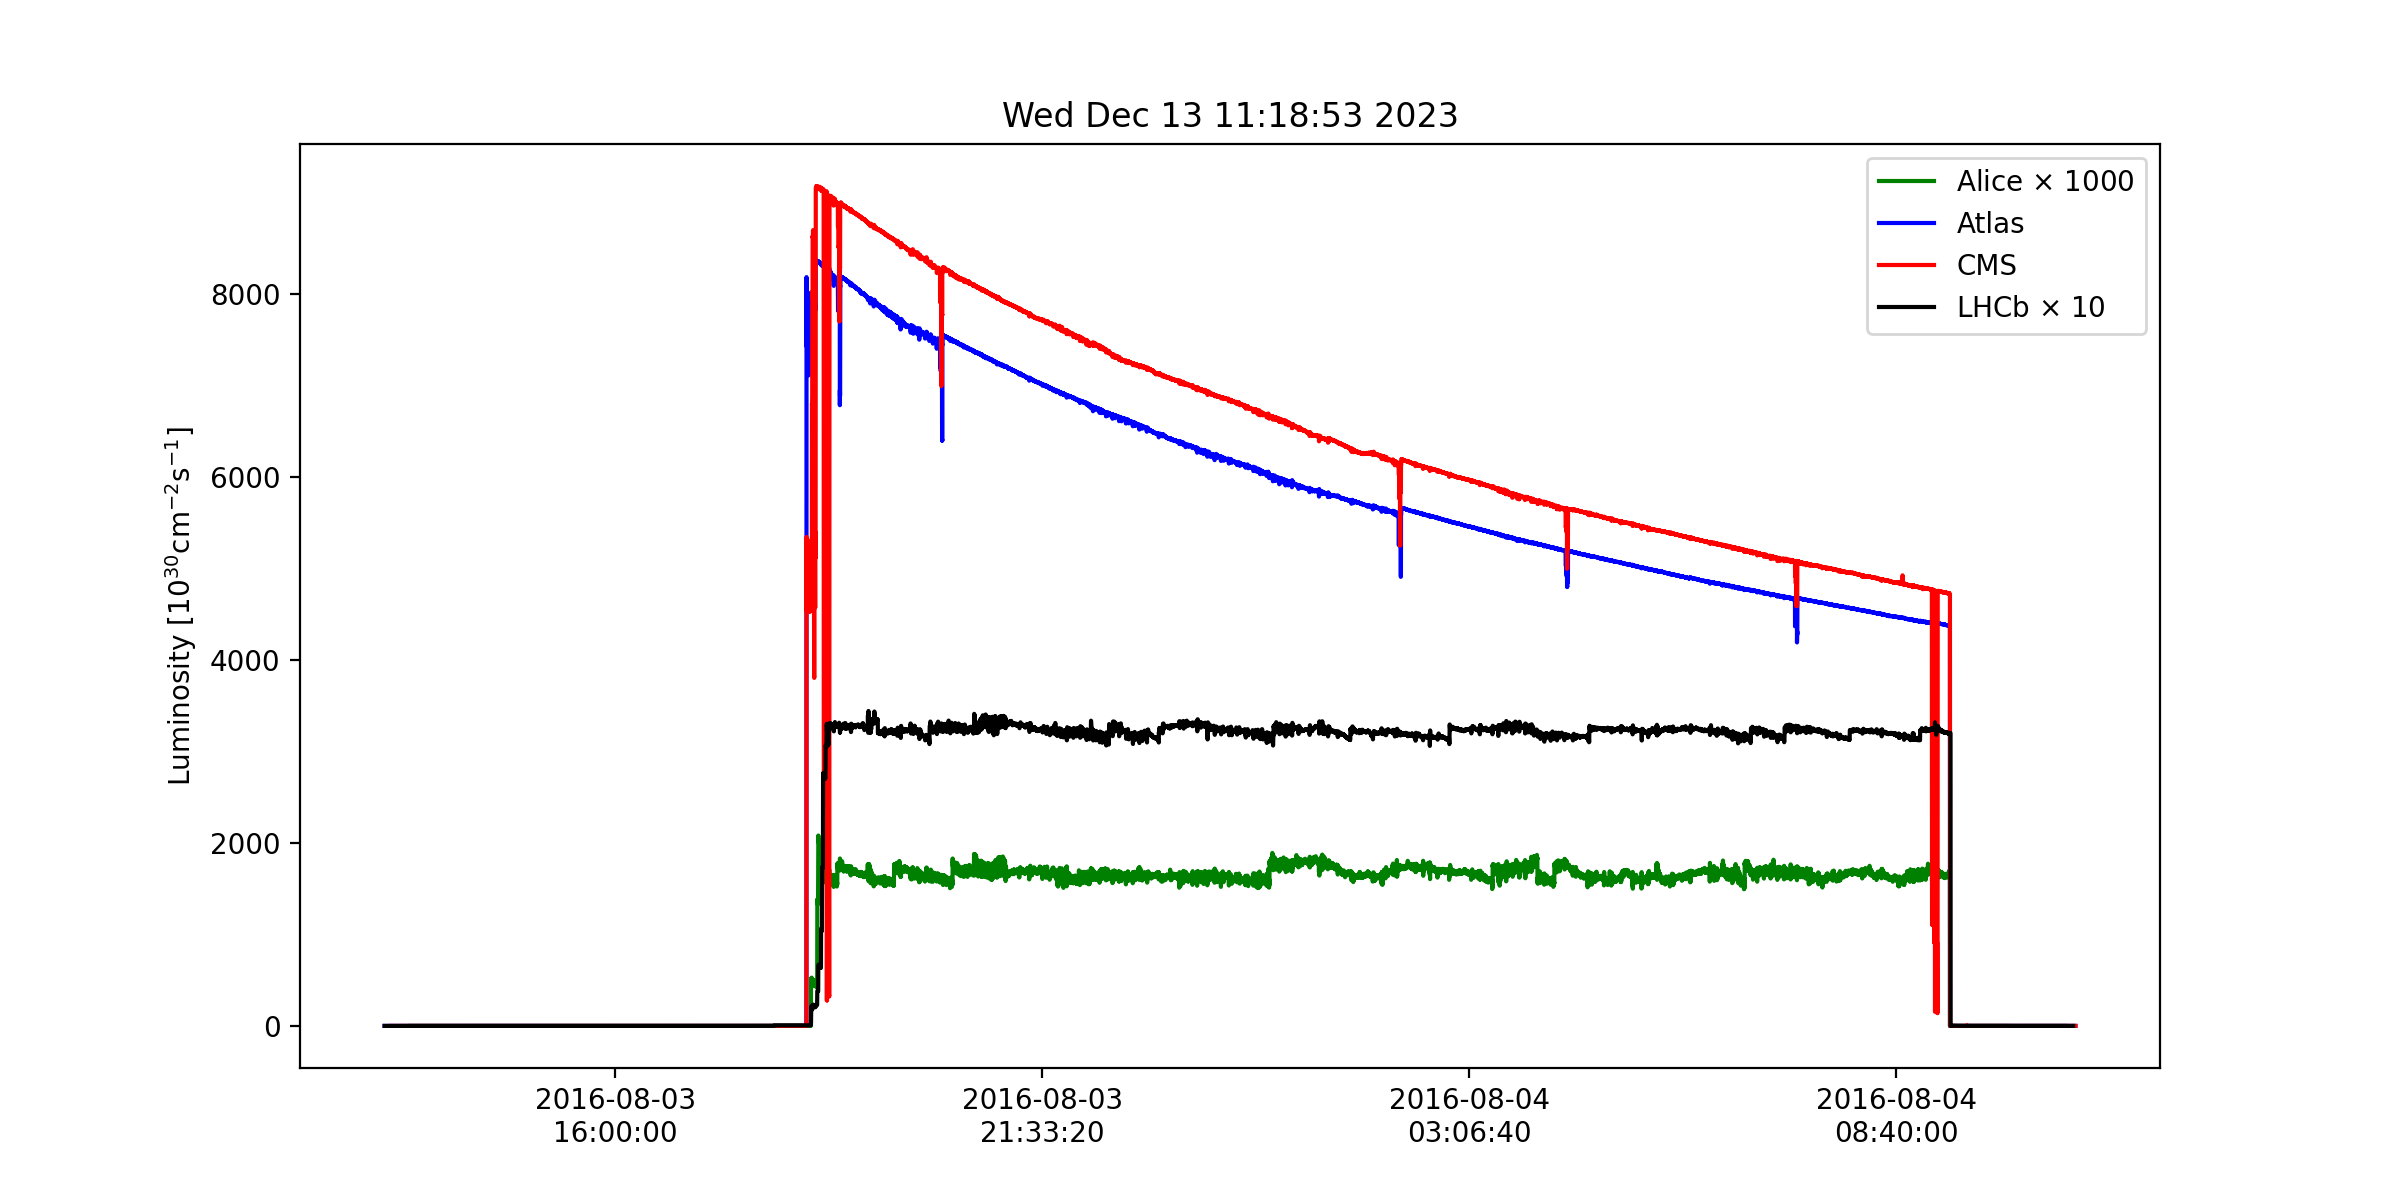

In [19]:
def dumpdate(t=None, fmt="%Y-%m-%d %H:%M:%S.SSS"):
    utc_dt = datetime.utcfromtimestamp(t)
    tz = pytz.timezone("Europe/Zurich")
    tz_dt = utc_dt.astimezone(tz)
    return tz_dt.strftime(fmt)


class rdmDateFormatter(ticker.Formatter):
    def __call__(self, x, pos=None):
        return dumpdate(x, fmt="%Y-%m-%d\n%H:%M:%S")


# Create figure
plt.figure(figsize=(12, 6))

# Plot Alice
tt, vv = data[alice]
plt.plot(tt, 1000 * vv, '-g', label=r'Alice $\times$ 1000')

# Plot Atlas
tt, vv = data[atlas]
plt.plot(tt, vv, '-b', label='Atlas')

# Plot CMS
tt, vv = data[cms]
plt.plot(tt, vv, '-r', label='CMS')

# Plot LHCb
tt, vv = data[lhcb]
plt.plot(tt, 10 * vv, '-k', label=r'LHCb $\times$ 10')

# Set axis and legend
plt.ylabel(r'Luminosity [$10^{30} \rm cm^{-2}  s^{-1}$]')
plt.legend()
plt.title(time.asctime(time.localtime(now)))

# set xaxis date
ax = plt.gca()
ax.xaxis.set_major_formatter(rdmDateFormatter())
ax.xaxis.major.locator._nbins = 6
plt.draw()
